<a href="https://colab.research.google.com/github/melius30/CE_200A_project/blob/main/CE200A_Problem_Set_7_Elius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE200A: Environmental Fluid Mechanics

### Problem Set 7

**Course Professor:** Tina Chow (tinakc@berkeley.edu) (CEE, UC Berkeley)

**Python:** Ajay B Harish (ajaybh@berkeley.edu) (SimCenter, UC Berkeley), with Adam Wise (adamwise@berkeley.edu) (CEE, UC Berkeley)

---

### Due date

Oct. 18 at 5pm

Describe the setup and each step in your solutions with words and clearly label your final answers. Use Python in Google Colab for plotting and programming. Use the ‘Print’ feature inside Google Colab which allows you to make a nice pdf of your code and plots.  Include your handwritten work in the pdf too.

###Question 1

Use modified wavenumber analysis (where $k′$ is the modified wavenumber) to compare the accuracy of the following schemes:

\begin{equation}
\begin{split}
f'_j &= \frac{f_{j+1} - f_{j-1}}{2\Delta} \ \text{2nd order}\\
f'_j &= \frac{f_{j-2} - 8f_{j-1} + 8f_{j+1} - f_{j+2}}{12\Delta} \ \text{4th order}
\end{split}
\end{equation}

Show how you derive $k′$ and then plot $k′\Delta$ vs. $k \Delta$ for $0 \le k\Delta \le \pi$ for both schemes and comment on the behavior.

### Solution 01: Modified Wave Number Analysis

Euler's formula:

$$
f = e^{ikx} = \cos(kx) + i \sin(kx)
$$

df/dx = f ' :

$$
f' = ike^{ikx} = ikf
$$



Modified wavenumber for 2nd order central difference scheme:

$$
f'_j = \frac{f_{j+1} - f_{j-1}}{2\Delta}
$$

$$
f'_j = \frac{e^{ik(x+\Delta)} - e^{ik(x-\Delta)}}{2\Delta}
$$

$$
f'_j = e^{ikx} \frac{2i \sin(k\Delta)}{2\Delta}
$$

$$
f'_j = e^{ikx} \left( \frac{\cos(k\Delta) + i \sin(k\Delta) - \cos(k\Delta) + i \sin(k\Delta)}{2\Delta} \right)
$$

$$
f'_j = i \frac{\sin(k\Delta)}{\Delta} e^{ikx} = i \frac{\sin(k\Delta)}{\Delta} f
$$

$$
ikf = i \frac{\sin(k\Delta)}{\Delta} f
$$

$$
k' = \frac{\sin(k\Delta)}{\Delta}
$$


Modified wavenumber for 4th order central difference scheme:

$$
f'_j = \frac{f_{j-2} - 8f_{j-1} + 8f_{j+1} - f_{j+2}}{12\Delta}
$$

$$
f'_j = \frac{e^{ik(x-2\Delta)} - 8e^{ik(x-\Delta)} + 8e^{ik(x+\Delta)} - e^{ik(x+2\Delta)}}{12\Delta}
$$

$$
f'_j = e^{ikx} \left( \frac{e^{-2ik\Delta} - 8e^{-ik\Delta} + 8e^{ik\Delta} - e^{2ik\Delta}}{12\Delta} \right)
$$

$$
f'_j = i \left( \frac{16 \sin(k\Delta) - 2 \sin(2k\Delta)}{12\Delta} \right) e^{ikx}
$$

$$
ikf = i \frac{16 \sin(k\Delta) - 2 \sin(2k\Delta)}{12\Delta} f
$$

$$
k' = \frac{8 \sin(k\Delta) - \sin(2k\Delta)}{6\Delta}
$$






[Text(0, 0.0, '0'),
 Text(0, 0.7853981633974483, '$\\pi$/4'),
 Text(0, 0.7853981633974483, '$\\pi$/4'),
 Text(0, 1.5707963267948966, '$\\pi$/2'),
 Text(0, 2.356194490192345, '$3\\pi$/4'),
 Text(0, 3.141592653589793, '$\\pi$')]

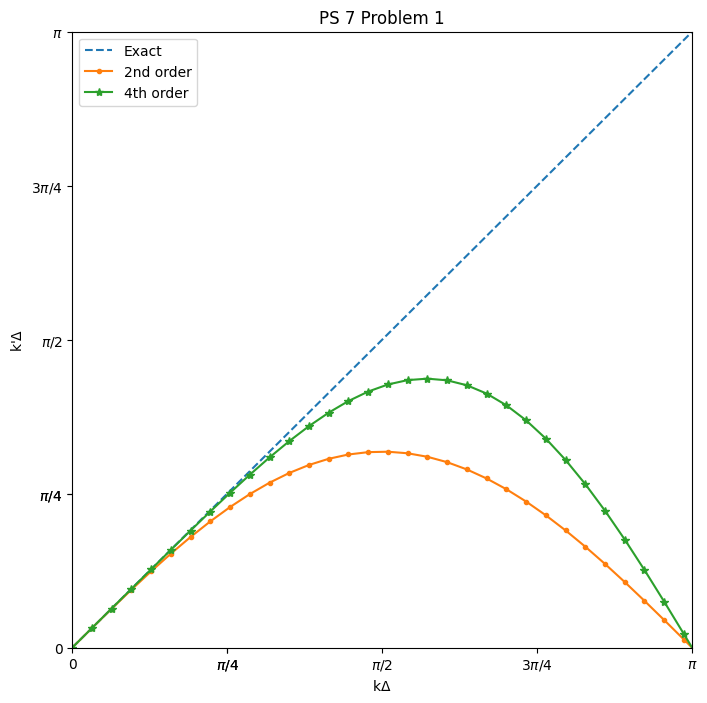

In [2]:
# add your plot here - look back at your previous assignments (or see below) for code to use for making a basic plot

# Reset variables and import relevant packages
%reset -f
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
# Create uniformly spaced data between 0 to pi
# for k\Delta
kdel = np.arange(0,math.pi+0.1,0.1)
# Get modified wave number from second and fourth orders
ord2kdel = np.sin(kdel)
ord4kdel = (8*np.sin(kdel) - np.sin(2*kdel))/6
# Plot the exact approximation and compare with
# 2nd and 4th order solutions
fig, main_ax = plt.subplots()
fig.set_size_inches(8, 8)
main_ax.plot(kdel, kdel,'--', kdel, ord2kdel,'.-', kdel, ord4kdel,'*-')
main_ax.set_ylim(0, math.pi)
main_ax.set_xlim(0, math.pi)
main_ax.set_xlabel('k$\Delta$')
main_ax.set_ylabel('k\'$\Delta$')
main_ax.set_title('PS 7 Problem 1')
main_ax.legend(['Exact', '2nd order', '4th order'])
# Set the tick labels
main_ax.set_xticks([0, math.pi/4, math.pi/4, math.pi/2, 3*math.pi/4, math.pi])
main_ax.set_xticklabels(['0', '$\pi$/4', '$\pi$/4', '$\pi$/2', '$3\pi$/4', '$\pi$'])
main_ax.set_yticks([0, math.pi/4, math.pi/4, math.pi/2, 3*math.pi/4, math.pi])
main_ax.set_yticklabels(['0', '$\pi$/4', '$\pi$/4', '$\pi$/2', '$3\pi$/4', '$\pi$'])



Acoording to the plot shown in above, both 2nd and 4th orders give more accurte results at the begining untill 45 degree (pi/4) then errors get wider. The fourth-order approximation matches better with exact solution at greater values of \(k\Delta\) than the second order. However, the approximation is poor regardless of the order of the scheme as \(k\Delta\) approaches 180 (pi).

### Question 2

There will be discussion of this problem in discussion section on Monday.

Consider the 1D steady-state diffusion problem:

\begin{equation}
\frac{\partial^2 \phi}{\partial x^2} = 0
\end{equation}

over the domain $x=0$ to 1 with $\phi = 2$ at $x=0$ and $\phi = 3$ at $x=1$. Solve this using a second-order finite difference scheme (as done in the lecture video). Set up the tridiagonal matrix that you will solve.

(a) Use the Thomas algorithm to solve the problem using Python. (Note: You can write the Thomas algorithm as a function in Python as it may come in handy in future assignments. See the function thomasalg() given below for a template.) Make your code adjustable for any number of grid points and plot the solution for N = 21.

(b) To convince yourself that the Thomas algorithm is worth using for a tridiagonal matrix, make some computational cost comparisons. First, set up a full tridiagonal matrix (with all the zeros stored) and use Python’s ```linalg.splu``` solver from ```scipy``` to determine the solution.

**Hint:** You need to fill the tri-diagonal array first. You can do this using

```python
A = np.diag(np.delete(a,0),-1) + np.diag(np.delete(c,len(c)-1),-1)
np.fill_diagonal(A,b)
```
Then call the python function to solve sparse square matrices using an LU decomposition. If $\bf{A}\cdot\bf{x} = \bf{d}$ then to find $\bf{x} = \bf{A}^{-1}\cdot\bf{d}$ use

```python
import scipy.linalg as la
from scipy.linalg import solve
from scipy import sparse
import scipy.sparse.linalg
x = sparse.linalg.splu(A).solve(d)
```

To compare the computational cost of this approach to the Thomas algorithm you used above, you need to record how much time it takes for python to compute the answers. Use the function

```python
import time
t0 = time.time()
[Solution steps go here]
timetaken = time.time() - t0
```
to determine the time to obtain each solution.

The Python linalg.splu algorithm is specialized for tridiagonal matrices and fairly fast because of all the zeros. To get a sense of what full Gaussian elimination would cost, also compare your timings to a full matrix (no zeros) inversion by setting up a sample random matrix using

```python
B = (10*np.random.random((N,N)).astype(int)
dd = np.arange(N)
phi_magic = solve(B,dd)
```

You will have to use large $N$ before you see differences between these 3 solution costs. Plot the timings for various $N$ values. Discuss the advantages of using the Thomas algorithm for solving a tridiagonal matrix.


### Solution 2

The steps and code to solve this problem are outlined here. Fill in the details!

Write out the tridiagonal matrix setup for this problem first [and make sure you know how to do this on your own]:
\begin{equation}
\begin{bmatrix} 1 &0&0&&...& &0 \\
1 &-2&1&&&& \\0 &1&-2&1&& &\vdots\\
&&\ddots&\ddots&\ddots&&  \\
\vdots&&&1&-2&1&0\\
&&&&1&-2&1\\
0 &&...&&0&0&1\end{bmatrix}
\begin{bmatrix}
\Phi_1 \\\Phi_2\\ \vdots \\ \Phi_{N-1}\\\Phi_N
\end{bmatrix} =
\begin{bmatrix}
2 \\0 \\ \vdots \\ 0\\3
\end{bmatrix}
\end{equation}

In [34]:
# Reset all variables
%reset -f

# Import necessary modules
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

Start by writing a function to do the Thomas algorithm.

In [35]:
# Define the function for Thomas algorithm
def thomasalg(a,b,c,d):

    # Inputs: a, b, c are the diagonals of the matrix
    # All the input vectors are of the same length
    # Input: d is the RHS such that A*x = d
    # Output: x is the solution to A*x = d

    # Get the number of rows in the matrix
    n = len(b)

    # Initialize x (solution)
    x = np.empty([n])

    # Forward sweep
    bnew = b
    for ii in range(1,n):
      bnew[ii] = b[ii]-a[ii]/bnew[ii-1]*c[ii-1]
      d[ii] = d[ii]-d[ii-1]*a[ii]/bnew[ii-1];

    # Backward substitution
    x[n-1] = d[n-1]/bnew[n-1]
    for ii in range(n-2,-1,-1):
      x[ii] = (d[ii] - c[ii]*x[ii+1])/bnew[ii]

    # Return the solution
    return x

Test your Thomas algorithm with a simple case to make sure it's working:

In [36]:
N=20
# Initialize the four arrays
a = np.zeros([N,1]); a[0] = np.NaN; a[N-1] = 0
b = np.ones([N,1]); b[0] = 1; b[N-1] = 1
c = np.zeros([N,1]); c[0] = 0; c[N-1] = np.NaN
d = 2*np.ones([N,1]); d[0] = 2; d[N-1] = 2

# Initialize x, from 0 to 1 with N grid cells
x = np.linspace(0,1,N)

# Solve using the Thomas algorithm
phi = thomasalg(a,b,c,d)

print(phi)  #it should be an array of 2's

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


<ipython-input-35-50000559a3e2>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1] = d[n-1]/bnew[n-1]
<ipython-input-35-50000559a3e2>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[ii] = (d[ii] - c[ii]*x[ii+1])/bnew[ii]


(a) The solution with 21 grid points:

<ipython-input-35-50000559a3e2>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1] = d[n-1]/bnew[n-1]
<ipython-input-35-50000559a3e2>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[ii] = (d[ii] - c[ii]*x[ii+1])/bnew[ii]


Text(0.5, 1.0, 'PS 7 Problem 2a - Steady state diffusion')

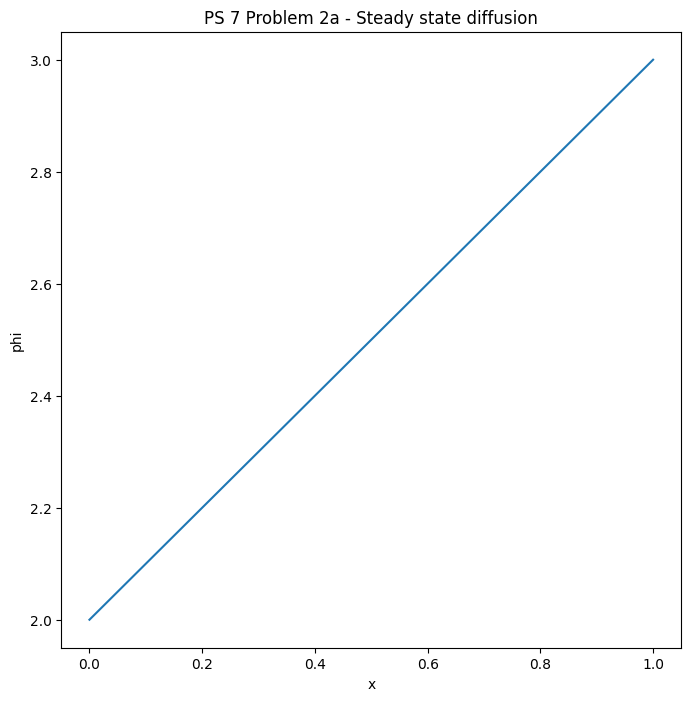

In [37]:
# Initialize size of array
N = 21 #21 grid points

# Initialize the four arrays
a = np.ones([N,1]); a[0] = np.NaN; a[N-1] = 0
b = -2*np.ones([N,1]); b[0] = 1; b[N-1] = 1
c = np.ones([N,1]); c[0] = 0; c[N-1] = np.NaN
d = np.zeros([N,1]); d[0] = 2; d[N-1] = 3

# Initialize x, from 0 to 1 with N-1 grid cells
x = np.linspace(0,1,N)

# Solve using the Thomas algorithm
phi = thomasalg(a,b,c,d)

# Plot the solution
fig, main_ax = plt.subplots()
fig.set_size_inches(8, 8)
main_ax.plot(x,phi)
main_ax.set_xlabel('x')
main_ax.set_ylabel('phi')
main_ax.set_title('PS 7 Problem 2a - Steady state diffusion')
#make sure this looks like you expect it to!

(b) The code and the plot for the computational time are given below. You just need to follow through to understand what it's doing and enter the matrix you want to solve, as above. The computational cost calculation is defined as a function so you can call it to create plots with different matrix sizes; see below.

In [38]:
# Import additional modules for solving matrices
import scipy.linalg as la
from scipy.linalg import solve
from scipy import sparse
import scipy.sparse.linalg

# Function for plotting matrix computation times
def matrixsolvetimes(matsize):

    # Initialize arrays for solutions and times
    steps = int(matsize/100)
    NN = np.zeros([steps])
    timeToThomas = np.zeros([steps])
    timeToSolveFullMatrix = np.zeros([steps])
    timeToSolveTridiagSPLU = np.zeros([steps])

    # Counter
    ii = 0

    # This loops over different values of N and calculates the time it takes
    # to solve the matrix for the Thomas algorithm vs Python's built-in
    # sparse matrix solver (SPLU). It also compares the cost of solving a full
    # matrix (no zeros) using a Gaussian elimination solver.
    for N in range(100, 100*(steps+1), 100):

        # Thomas algorithm
        # Initialize the four arrays
        # these lines should be the same as the arrays you defined in the previous code cell above

        # Initialize the four arrays
        a = np.ones([N,1]); a[0] = np.NaN; a[N-1] = 0
        b = -2*np.ones([N,1]); b[0] = 1; b[N-1] = 1
        c = np.ones([N,1]); c[0] = 0; c[N-1] = np.NaN
        d = np.zeros([N,1]); d[0] = 2; d[N-1] = 3

        # Get time to execute the Thomas algorithm
        t1 = time.time()
        phi_t = thomasalg(a,b,c,d)
        timeToThomas[ii] = time.time() - t1

        # Get the time to execute the linalg.splu algorithm (for sparse matrices)
        # Solve the tridiagonal matrix defined here
        A = np.diag(np.delete(a,0),-1) + np.diag(np.delete(c,len(c)-1),-1)
        np.fill_diagonal(A,b) #create full tridiagonal A matrix
        t2 = time.time()
        phi_m = sparse.linalg.spsolve(A,b)
        timeToSolveTridiagSPLU[ii] = time.time()-t2

        # Get the time to execute the linalg algorithm (for full matrix)
        # Solve the full matrix
        B = (10*np.random.random((N,N))).astype(int) #create random full matrix
        dd = np.arange(N) #create random d (right hand side vector)
        t3 = time.time()
        phi_full = solve(B, dd)
        timeToSolveFullMatrix[ii] = time.time() - t3

        NN[ii] = N
        ii = ii + 1 #increment the counter

    # Plot
    fig, main_ax = plt.subplots()
    fig.set_size_inches(8, 8)
    main_ax.plot(NN,timeToThomas,'o-',NN,timeToSolveTridiagSPLU,'s-',NN,timeToSolveFullMatrix,'d-')
    main_ax.set_xlabel('N')
    main_ax.set_ylabel('Time to Compute [s]')
    main_ax.set_title('PS 7 Problem 2b - Computation time')
    main_ax.legend(['Thomas algorithm', 'Python solver - Tridiagonal','Python solver - full matrix'])

<ipython-input-35-50000559a3e2>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1] = d[n-1]/bnew[n-1]
<ipython-input-35-50000559a3e2>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[ii] = (d[ii] - c[ii]*x[ii+1])/bnew[ii]
<ipython-input-38-1aa9034bad12>:46: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  phi_m = sparse.linalg.spsolve(A,b)
<ipython-input-38-1aa9034bad12>:46: MatrixRankWarning: Matrix is exactly singular
  phi_m = sparse.linalg.spsolve(A,b)


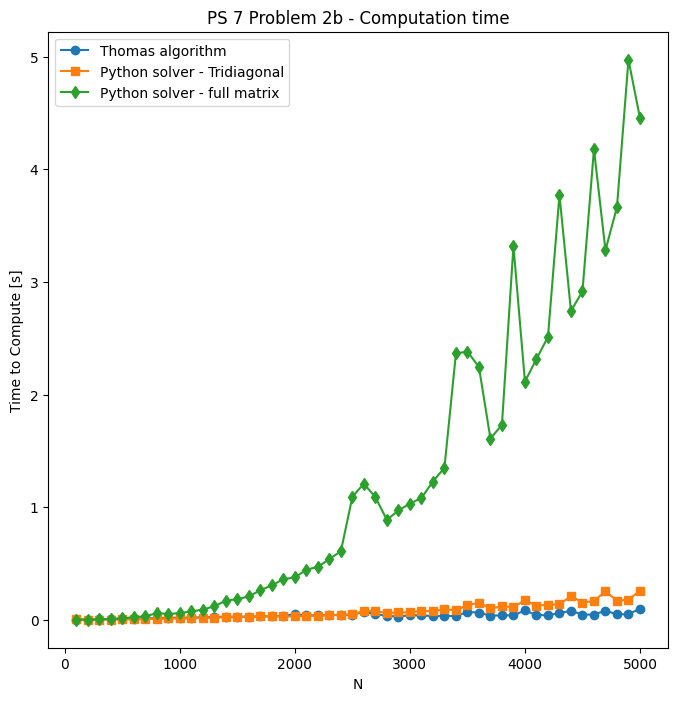

In [39]:
# Plot the computational times for matrix size of up to 2000
matsize = 5000
matrixsolvetimes(matsize)

Add some comments about the plot above. It might help to run the comparison for larger matrix sizes, up to 4000 or 5000

larget computional time: Python solver -full matrix(green line) => reason: every elements in the matrix is considered during computation. The compuational time sporadically grow with the large matrix size.

The Thomas algorithm and sparse LU decomposition solver provides faster results for very large arrays as they don't consider every matrix elements during computation(form upper and lower traingular matrix with zeros).  






### Question 3

We started this problem in class on Friday. There are some differences in the template provided, so you should carefully your array bounds and indices!

Consider the unsteady 1D scalar diffusion equation

\begin{equation}
\frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}
\end{equation}

given the initial and boundary conditions:

\begin{equation}
\begin{split}
c(x,0) &= 1 \ \text{for} \ |x| < 0.3 \\
c(x,0) &= 0 \ \text{for} \ |x| \ge 0.3 \\
\frac{\partial c}{\partial x} \vert_{(-2,t)} &= 0, \frac{\partial c}{\partial x} \vert_{(2,t)} &= 0
\end{split}
\end{equation}

Solve this equation numerically for $D = 0.1$.

(a) Use first-order explicit time stepping with central differences in space to compute the numerical solution. Use 60 grid cells (61 grid points) and select $r = 0.45$. Implement a second-order one-sided difference for the treatment of the boundary conditions. Plot your initial concentration profile, as well as the results at $t = 0.1, 1$ s. Discuss your results.

(b) Use superposition to state the analytical solution to this problem with the same initial conditions but in an infinite domain. (This is similar to Problem Set 5 #3b.) Plot the analytical solution with your numerical results at $t = 1$ s and discuss differences.

(c) Now run the code again using $c = 2 + x + \sin{(2\pi x)}$ as the initial condition, with $c(0,t) = 2$ and $c(1,t) = 3$ for boundary conditions (i.e. for the smaller domain in the previous problem). Discuss and plot the behavior of the solution as the code advances to steady state. (**Note:** you can create a branch in your code using an if statement to switch different boundary conditions or initial conditions on and off, so you can easily switch between options for parts (a) and (c), or you can create another copy of your code with the necessary changes.)

### Solution 3

Follow the steps and code outline provided here, and fill in the details.

Discretize the equation by hand and carefully write out the boundary conditions. It's recommended that you write out pseudo-code so you have a clear plan for your code structure and/or so you understand what is done in the template below.

### Numerical Solution of Diffusion Equation

1D scalar diffusion equation:

$$
\frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}
$$

#### (a) First-Order Explicit Scheme in Time and Central Difference in Space


$$
\frac{c_j^{n+1} - c_j^n}{\Delta t} = D \frac{c_{j+1}^n - 2c_j^n + c_{j-1}^n}{\Delta x^2}
$$

$$
c_j^{n+1} = c_j^n + D \Delta t \frac{c_{j+1}^n - 2c_j^n + c_{j-1}^n}{\Delta x^2}
$$

#### 2nd Order One-Sided Difference at Boundaries

At the left boundary (\(x = -2\), \(t\)):

$$
\frac{\partial c}{\partial x} \Bigg|_{(-2, t)} = \frac{-3c_1^n + 4c_2^n - c_3^n}{2\Delta x} = 0
$$

This gives:

$$
-3c_1^n + 4c_2^n - c_3^n = 0
$$

At the right boundary (\(x = 2\), \(t\)):

$$
\frac{\partial c}{\partial x} \Bigg|_{(2, t)} = \frac{3c_N^n - 4c_{N-1}^n + c_{N-2}^n}{2\Delta x} = 0
$$

This gives:

$$
3c_N^n - 4c_{N-1}^n + c_{N-2}^n = 0
$$




In [15]:
# Clear all variables
%reset -f

# Import necessary modules
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

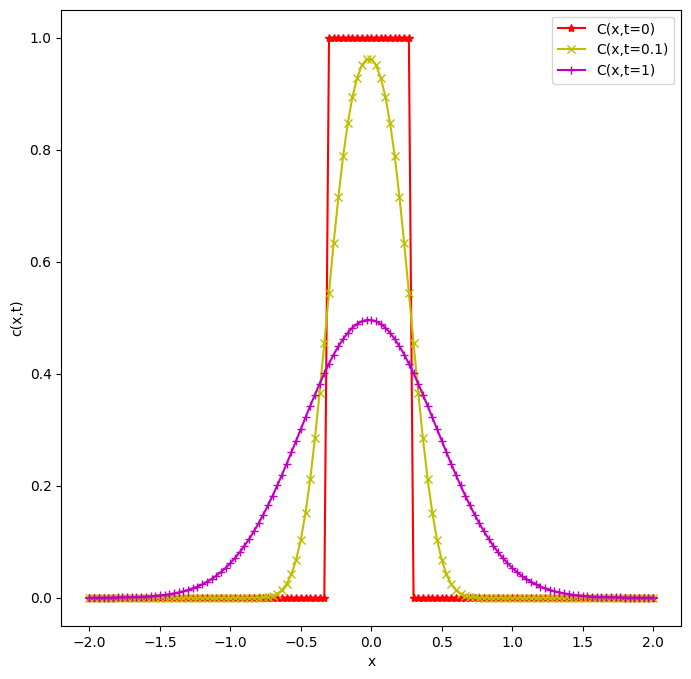

In [30]:
    # Set the number of grid cells
    N = 60

    # Set the parameters
    D = 0.1
    r = 0.45

    # Define BC and IC
    L = 2
    dx = L/N
    x = np.arange(-L,L+dx,dx)
    nx = len(x) #number of grid points
    c0 = np.empty([nx])

    # Define time step and time array
    dt = r*dx*dx/D  #adjust dt based on the chosen dx and r values
    time = np.arange(0,1+dt,dt) #time goes up to 1 sec
    nt = len(time)
    for ii in range (nx):
      if abs(x[ii]) < 0.3:
        c0[ii] = 1.0
      else:
        c0[ii] = 0.0
    # Initialize the "c" variable with the initial
    # conditions defined above. Apply BC at both ends
    c = np.array(c0) #initial condition
    c[0] = (1/3)*(4*c[1]-c[2]) #2nd order one-sided scheme
    c[nx-1] = (1/3)*(4*c[nx-2]-c[nx-1])

    # Main time advancement loop using explicit Euler in time, central in space
    for n in range (nt):

        # Update to new time step
        c_old = np.array(c)

        # Loop in space
        for ii in range (1,nx-1):
            c[ii] = (1-2*r)*c_old[ii] + r*(c_old[ii-1] + c_old[ii+1])

        # Update BC before the end of the time step
        c[0] = (1/3)*(4*c[1] - c[2]) #one sided difference for BC's
        c[nx-1] = (1/3)*(4*c[nx-2] - c[nx-3])

        # Save for plotting
        if n == math.floor(nt/10): #store data at 0.1 sec, 1/10 of the way
            cmid = np.array(c)

    # Plot the results
    fig, main_ax = plt.subplots()
    fig.set_size_inches(8, 8)
    main_ax.plot(x, c0,'r-*',x, cmid,'y-x',x, c,'m-+')
    main_ax.set_xlabel('x')
    main_ax.set_ylabel('c(x,t)')
    main_ax.legend(['C(x,t=0)', 'C(x,t=0.1)', 'C(x,t=1)'])



Comment on the results.


This is a pure diffusion scenario. Initially (𝑡 = 0), the concentration was a square pulse from −0.3 to 0.3 with a value of 1, while it was zero elsewhere. Over time, the pulse broadens, following a Gaussian distribution. The amplitude decreases, spreading symmetrically in both directions and filling previously zero areas with non-zero values (red > yellow > magenta)


(b) Write out the analytical solution then compare to the finite difference solution.

Text(0.5, 1.0, 'PS 7 Problem 3b, C(x,t) at t = 1s')

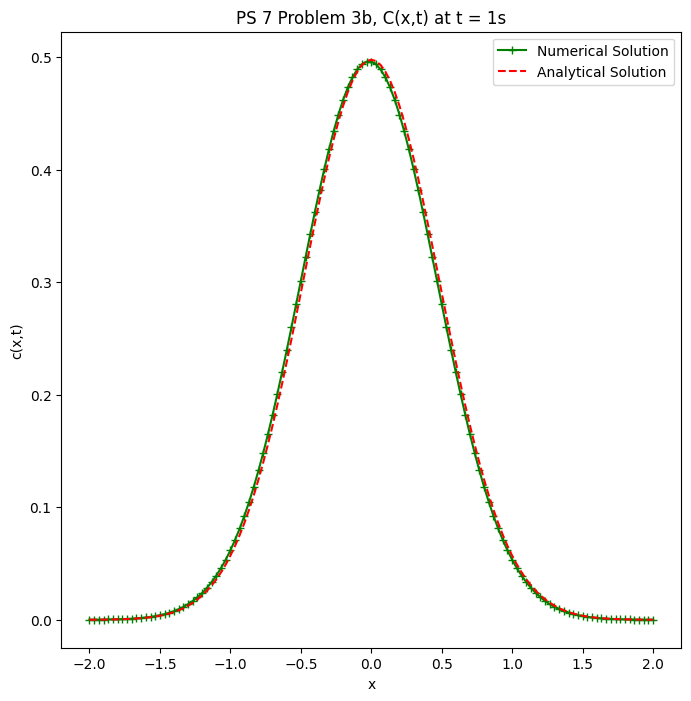

In [19]:
# Provide the time to compare solutions
t = 1 #1 sec

# Initialize array for cAnalytical
cAnalytical = np.empty([len(x)])

# Calculate the analytical solution
for ii in range(len(x)):
    v1 = (x[ii]-0.3)/np.sqrt(4*D*t)
    v2 = (x[ii]+0.3)/np.sqrt(4*D*t)
    cAnalytical[ii] = 0.5*(-math.erf(v1)+math.erf(v2))
# Plot the analytical solution
fig, main_ax = plt.subplots()
fig.set_size_inches(8, 8)
main_ax.plot(x, c,'g-+',x, cAnalytical,'r--')
main_ax.set_xlabel('x')
main_ax.set_ylabel('c(x,t)')
main_ax.legend(['Numerical Solution','Analytical Solution'])
main_ax.set_title('PS 7 Problem 3b, C(x,t) at t = 1s')

(c) Modify your code from part (a) above to handle the different boundary and initial conditions.

This could mean creating a new version of the code with these new options, or modifying the version above to have the ability to handle both options.


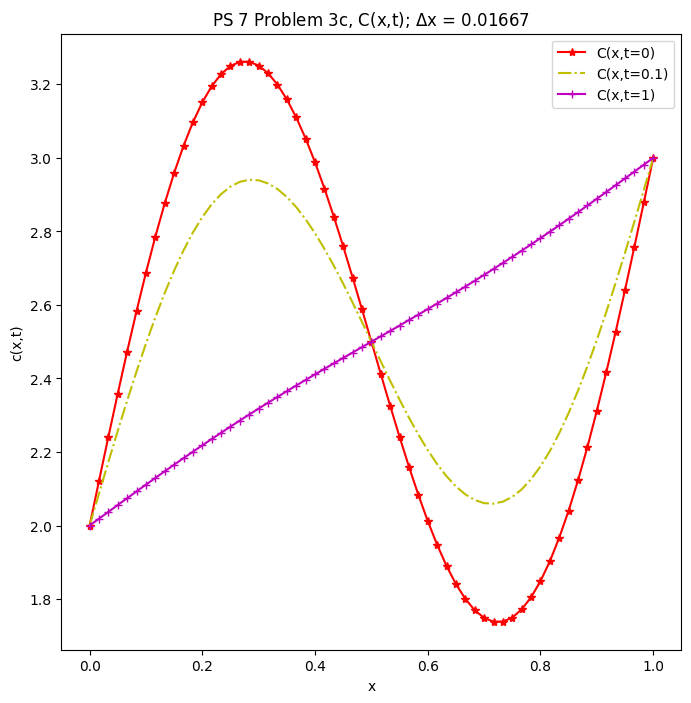

In [40]:
# Clear all variables
%reset -f
# Import necessary modules
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
# Create a function for the unsteady 1D scalar diffusion
def sca1Ddiffusion(bc23):
    # Define the number of grid cells
    N = 60
    # Set the parameters
    D = 0.1 #diffusivity
    r = 0.25 #r = D*dt/dx^2

    # Define BC and IC for each case
    if bc23 == 1:
        L = 1
        dx = L/N
        x = np.arange(0,L+dx,dx)
        nx = len(x)
        c0 = 2 + x + np.sin(2*math.pi*x)
    else:
        L = 2
        dx = 2*L/N
        x = np.arange(-L,L+dx,dx)
        nx = len(x)
        c0 = np.empty([nx])
        for ii in range (nx):
            if abs(x[ii]) < 0.3:
                c0[ii] = 1.0
            else:
                c0[ii] = 0.0
# Define time step and time array
    dt = r*dx*dx/D  #adjust dt based on the chosen dx and r values
    time = np.arange(0,1+dt,dt) #time goes up to 1 sec
    nt = len(time)
    # Initialize the "c" variable with the initial
    # conditions defined above. Apply BC at both ends
    c = np.array(c0)
    if bc23 == 1:
        c[0] = 2
        c[nx-1] = 3;
    else:
        c[0] = (1/3)*(4*c[1] - c[2]) #2nd order one-sided scheme
        c[nx-1] = (1/3)*(4*c[nx-2] - c[nx-3])
    # Main time advancement loop using explicit Euler
    # in time and 2nd order central difference in space
    for n in range (nt):
        # Update to new time step
        c_old = np.array(c)
        # Loop in space
        for ii in range (1,nx-1):
            c[ii] = (1-2*r)*c_old[ii] + r*(c_old[ii-1] + c_old[ii+1])
        # Update BC
        # Note: This is not needed if bc23 = 1 case since c[0] and c[nx-1]
        # do not change with time
        if bc23 == 0:
            c[0] = (1/3)*(4*c[1] - c[2]) #one sided difference for BC's
            c[nx-1] = (1/3)*(4*c[nx-2] - c[nx-3])
   # Save data for plotting below
        if n == math.floor(nt/10): #store data at 0.1 sec
            cmid = np.array(c)
    # Plot the results
    fig, main_ax = plt.subplots()
    fig.set_size_inches(8, 8)
    main_ax.plot(x, c0,'r-*',x, cmid,'y-.',x, c,'m-+')
    main_ax.set_xlabel('x')
    main_ax.set_ylabel('c(x,t)')
    main_ax.legend(['C(x,t=0)', 'C(x,t=0.1)', 'C(x,t=1)'])
    if bc23 == 0:
        main_ax.set_title('PS 7 Problem 3a, C(x,t); $\Delta$x = '+'{:.5f}'.format(dx))
    elif bc23 == 1:
        main_ax.set_title('PS 7 Problem 3c, C(x,t); $\Delta$x = '+'{:.5f}'.format(dx))

    return x,c,D
# Define the boundary condition flag
# bc23 = 0 (For Part a)
bc23 = 1 # For Part c
# Call the unsteady code
[x,c,D] = sca1Ddiffusion(bc23)














The concentration profile initially starts as a sinusoidal curve(inital condition) and evolves over time. At 𝑡= 0.1, the concentration decreases and flattens, and by t=1, the solution is nearly linear, approaching the steady state condition.